# FOREST HEALTH UK #

## Goals #
### To assess tree condition based on local crown density reduction and effects of the climate change and pollutants on the target. 
### Try to predict forest dynamics


### Datasets:

### * Forest condition survey 1987 - 2007 between June and September
### * Plot data
### * Annual rainfall data
### * Annual temperature data
### * Air pollution data









In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Importing the data

## Forest condition survey data

In [3]:
#Loading multiple excel workbooks 
fn = '/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/data.xls'
xl = pd.ExcelFile(fn)
xl.sheet_names

['PLOT',
 'Data-BE',
 'Data-NS',
 'Data-OK',
 'Data-SP',
 'Data-SS',
 'Data-MX',
 'Data-NI',
 'Data reference tables',
 'FOL95',
 'FOLIAR',
 'SOIL']

In [4]:
#overview of each excel sheet
for sh in xl.sheet_names:
    df_xl = xl.parse(sh)
    print('Processing: [{}] ...'.format(sh))
    print(df_xl.head())

Processing: [PLOT] ...
                 NAME     SECTION PLTTP  PLOT NUMBER  PLANTING YEAR  \
0  TILHILL ECON FORES   NEW COPSE    BE            1           1900   
1     WENDOVER FOREST  MAIN BLOCK    BE            2           1847   
2               KINGS    WORDWELL    BE            3           1910   
3          DON FOREST      MELTON    BE            5           1920   
4   KEIR & CAWDER EST         NaN    BE            6           1907   

  FCCOMPARTMENT NATIONAL GRID REFERENCE  EASTINGS  NORTHINGS  ALTITUDE ASPECT  \
0           NaN                SU690807  469000.0   180700.0     110.0      F   
1            9F                SP897084  489700.0   208400.0     260.0      F   
2         4200B                TL829741  582900.0   274100.0      40.0      F   
3           49C                SE509035  450900.0   403500.0      76.0      F   
4           NaN                NS765988  276500.0   698800.0      70.0      S   

   SLOPE      LATIT    LONGIT  WATER  HUMUS  SOILUNIT  
0    0.

Processing: [Data-NS] ...
   Year Plot type Assessment Date Assessment type  Plot number Subplot  \
0  1987        NS             NaT               M            1       E   
1  1987        NS             NaT               M            1       E   
2  1987        NS             NaT               M            1       E   
3  1987        NS             NaT               M            1       E   
4  1987        NS             NaT               M            1       E   

   Tree number Species  Local crown density  DBH (mm)  Height (cm)  \
0            1      NS                  NaN       280          203   
1            2      NS                  NaN       290          208   
2            3      NS                  NaN       270          197   
3            4      NS                  NaN       345          181   
4            5      NS                  NaN       255          183   

   Tree dominance class  Canopy closure class  Branch pattern class in spruce  \
0                   NaN    

Processing: [Data-OK] ...
   Year Plot type Assessment Date Assessment type  Plot number Subplot  \
0  1987        OK             NaT               M            1       E   
1  1987        OK             NaT               M            1       E   
2  1987        OK             NaT               M            1       E   
3  1987        OK             NaT               M            1       E   
4  1987        OK             NaT               M            1       E   

   Tree number Species  Local crown density  DBH (mm)  Height (cm)  \
0            1      OK                  NaN     864.0        208.0   
1            2      OK                  NaN     747.0        208.0   
2            3      OK                  NaN     787.0        238.0   
3            4      OK                  NaN     747.0        253.0   
4            5      OK                  NaN     674.0        223.0   

   Tree dominance class  Canopy closure class  Branch pattern class in spruce  \
0                   NaN    

Processing: [Data-SP] ...
   Year Plot type Assessment Date Assessment type  Plot number Subplot  \
0  1987        SP             NaT               M           11       E   
1  1987        SP             NaT               M           11       E   
2  1987        SP             NaT               M           11       E   
3  1987        SP             NaT               M           11       E   
4  1987        SP             NaT               M           11       E   

   Tree number Species  Local crown density  DBH (mm)  Height (cm)  \
0            1      SP                  NaN       0.0          0.0   
1            2      SP                  NaN       0.0          0.0   
2            3      SP                  NaN       0.0          0.0   
3            4      SP                  NaN       0.0          0.0   
4            5      SP                  NaN       0.0          0.0   

   Tree dominance class  Canopy closure class  Branch pattern class in spruce  \
0                   NaN    

Processing: [Data-SS] ...
   Year Plot type Assessment Date Assessment type  Plot number Subplot  \
0  1987        SS             NaT               M           11       E   
1  1987        SS             NaT               M           11       E   
2  1987        SS             NaT               M           11       E   
3  1987        SS             NaT               M           11       E   
4  1987        SS             NaT               M           11       E   

   Tree number Species  Local crown density  DBH (mm)  Height (cm)  \
0            1      SS                  NaN       0.0            0   
1            2      SS                  NaN       0.0            0   
2            3      SS                  NaN       0.0            0   
3            4      SS                  NaN       0.0            0   
4            5      SS                  NaN       0.0            0   

   Tree dominance class  Canopy closure class  Branch pattern class in spruce  \
0                   NaN    

converting each excel sheet into separate csv 
for sheet_name in sheets: 
    sheet = pd.read_excel(excel_file, sheet_name=sheet_name) 
    sheet.to_csv("/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/%s.csv" % sheet_name, index=False)



In [5]:
#importing csv to bo used for the analysis
import glob
files = glob.glob('/Users/sandra/Desktop/Capstone/data/*.csv')
files

['/Users/sandra/Desktop/Capstone/data/Data-NI.csv',
 '/Users/sandra/Desktop/Capstone/data/Data-OK.csv',
 '/Users/sandra/Desktop/Capstone/data/Data-SS.csv',
 '/Users/sandra/Desktop/Capstone/data/Data-SP.csv',
 '/Users/sandra/Desktop/Capstone/data/Data-MX.csv',
 '/Users/sandra/Desktop/Capstone/data/Data-NS.csv',
 '/Users/sandra/Desktop/Capstone/data/Data-BE.csv']

Initially I have concatenated all sheets at once, but this resulted in loosing too many data at later stage of cleaning.
I"ve decided to concat and then merge some sheets separately in order to retain as many data as possible

In [6]:
# reading and concating forest condition data
# for files in glob.glob()
df = pd.concat([pd.read_csv(f) for f in glob.glob('/Users/sandra/Desktop/Capstone/data/*.csv')], ignore_index = True)

/Users/sandra/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (2,59) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
#reading forest plot data
plot = pd.read_csv('/Users/sandra/Desktop/Capstone/data/plot_data/plot.csv')

In [8]:
plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NAME                     448 non-null    object 
 1   SECTION                  421 non-null    object 
 2   PLTTP                    468 non-null    object 
 3   PLOT NUMBER              468 non-null    int64  
 4   PLANTING YEAR            468 non-null    int64  
 5   FCCOMPARTMENT            409 non-null    object 
 6   NATIONAL GRID REFERENCE  468 non-null    object 
 7   EASTINGS                 464 non-null    float64
 8   NORTHINGS                464 non-null    float64
 9   ALTITUDE                 466 non-null    float64
 10  ASPECT                   465 non-null    object 
 11  SLOPE                    461 non-null    float64
 12  LATIT                    128 non-null    float64
 13  LONGIT                   128 non-null    float64
 14  WATER                    9

In [9]:
#renaming columns,so they match to the main data set and this columns will be used in merge
plot_new_columns_dict = {'PLTTP': 'Plot type', 'PLOT NUMBER': 'Plot number' }
plot.rename(columns=plot_new_columns_dict, inplace=True)

In [10]:
plot.dropna(subset=['EASTINGS',
    'NORTHINGS'], inplace = True)
plot.shape

(464, 17)

### Getting longitude and latitude and mapping out plots using geopandas

In [11]:
from pyproj import Proj, transform
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from geopandas import GeoDataFrame

https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da

In [12]:
#using code found on stackoverflow to convert eastings and northings into longitude and latitude, that will allow to visualize
#geospatial data
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy",
        towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")


def convertLL(plot):

    easting = plot['EASTINGS']
    northing = plot['NORTHINGS']
    

    vlon36, vlat36 = vgrid(easting, northing, inverse=True)

    converted = transform(v36, v84, vlon36, vlat36)

    plot['longitude'] = converted[0]
    plot['latitude'] = converted[1]

    return plot


#plot = pd.read_csv('/Users/sandra/Desktop/Capstone/data/plot_data/plot.csv')
plot = plot.apply(convertLL, axis=1)

/Users/sandra/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/sandra/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
<ipython-input-12-5490cf539a71>:17: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = 

In [13]:
plot.head()

,NAME,SECTION,Plot type,Plot number,PLANTING YEAR,FCCOMPARTMENT,NATIONAL GRID REFERENCE,EASTINGS,NORTHINGS,ALTITUDE,ASPECT,SLOPE,LATIT,LONGIT,WATER,HUMUS,SOILUNIT,longitude,latitude
0,TILHILL ECON FORES,NEW COPSE,BE,1,1900,NaN,SU690807,469000.0,180700.0,110.0,F,0.0,51.520278,-1.005278,2.0,1.0,197.0,-1.006900,51.521013
1,WENDOVER FOREST,MAIN BLOCK,BE,2,1847,9F,SP897084,489700.0,208400.0,260.0,F,0.0,NaN,NaN,NaN,NaN,NaN,-0.701532,51.767103
2,KINGS,WORDWELL,BE,3,1910,4200B,TL829741,582900.0,274100.0,40.0,F,0.0,52.333889,0.684722,2.0,1.0,134.0,0.683016,52.334490
3,DON FOREST,MELTON,BE,5,1920,49C,SE509035,450900.0,403500.0,76.0,F,0.0,53.525278,-1.231944,1.0,1.0,208.0,-1.233675,53.525707
4,KEIR & CAWDER EST,NaN,BE,6,1907,NaN,NS765988,276500.0,698800.0,70.0,S,0.0,56.165833,-3.988889,2.0,1.0,147.0,-3.990391,56.165809


In [14]:
plot.isna().sum()

NAME                        17
SECTION                     44
Plot type                    0
Plot number                  0
PLANTING YEAR                0
FCCOMPARTMENT               59
NATIONAL GRID REFERENCE      0
EASTINGS                     0
NORTHINGS                    0
ALTITUDE                     2
ASPECT                       3
SLOPE                        7
LATIT                      339
LONGIT                     339
WATER                      376
HUMUS                      376
SOILUNIT                   376
longitude                    0
latitude                     0
dtype: int64

#merging forest condition and plot data
data = df.merge(plot, on=['Plot type', 'Plot number'])
data.shape

In [15]:
#creating Geo data frame, so the geometry object/column is created out of longitude and latitute
#this will allow to plot the data point on the map
gdf = gpd.GeoDataFrame(
    plot, geometry=gpd.points_from_xy(plot.longitude, plot.latitude))

In [16]:
# County boundaries in UK (Polygon) - UK map template
counties = gpd.read_file('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Igismap/UnitedKingdom_Bound.shp')

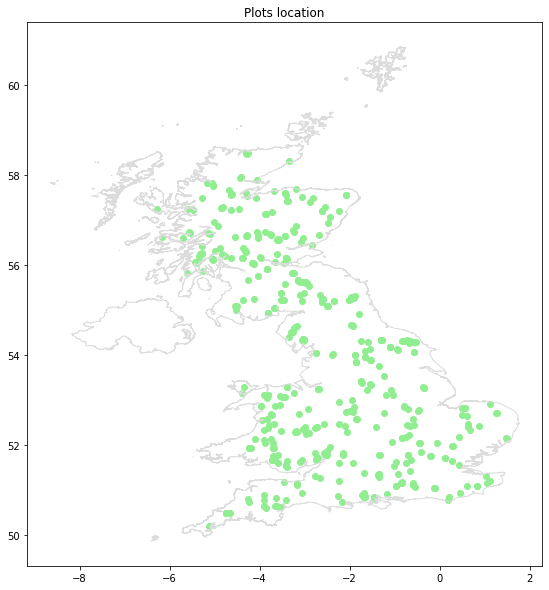

In [17]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Adding tree plot location to the base map
gdf.plot(color='lightgreen', ax=ax)
ax.set_title('Plots location');

In [18]:
plot.head()

,NAME,SECTION,Plot type,Plot number,PLANTING YEAR,FCCOMPARTMENT,NATIONAL GRID REFERENCE,EASTINGS,NORTHINGS,ALTITUDE,ASPECT,SLOPE,LATIT,LONGIT,WATER,HUMUS,SOILUNIT,longitude,latitude,geometry
0,TILHILL ECON FORES,NEW COPSE,BE,1,1900,NaN,SU690807,469000.0,180700.0,110.0,F,0.0,51.520278,-1.005278,2.0,1.0,197.0,-1.006900,51.521013,POINT (-1.00690 51.52101)
1,WENDOVER FOREST,MAIN BLOCK,BE,2,1847,9F,SP897084,489700.0,208400.0,260.0,F,0.0,NaN,NaN,NaN,NaN,NaN,-0.701532,51.767103,POINT (-0.70153 51.76710)
2,KINGS,WORDWELL,BE,3,1910,4200B,TL829741,582900.0,274100.0,40.0,F,0.0,52.333889,0.684722,2.0,1.0,134.0,0.683016,52.334490,POINT (0.68302 52.33449)
3,DON FOREST,MELTON,BE,5,1920,49C,SE509035,450900.0,403500.0,76.0,F,0.0,53.525278,-1.231944,1.0,1.0,208.0,-1.233675,53.525707,POINT (-1.23368 53.52571)
4,KEIR & CAWDER EST,NaN,BE,6,1907,NaN,NS765988,276500.0,698800.0,70.0,S,0.0,56.165833,-3.988889,2.0,1.0,147.0,-3.990391,56.165809,POINT (-3.99039 56.16581)


# Retreving country name using geopy

Before temperature, rainfall and air pollution data can be merged, country name needs to be retrieved. Adreesses has been obtained via reverse coding using geopy. Countries has been extracted from address column

In [19]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
#import plotly_express as px
import tqdm
from tqdm.notebook import tqdm_notebook

In [20]:
#using reverse coding to retrieve addresses information from latitude and longitude
locator = Nominatim(user_agent='myGeocoder')
coordinates = '53.480837, -2.244914'
location = locator.reverse(coordinates)
location.raw

{'place_id': 99947687,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 37139875,
 'lat': '53.4809597',
 'lon': '-2.2450668274629235',
 'display_name': 'Eagle Insurance Buildings, 68, Cross Street, City Centre, Manchester, Greater Manchester, North West England, England, M2 4JG, United Kingdom',
 'address': {'building': 'Eagle Insurance Buildings',
  'house_number': '68',
  'road': 'Cross Street',
  'suburb': 'City Centre',
  'city': 'Manchester',
  'county': 'Greater Manchester',
  'state_district': 'North West England',
  'state': 'England',
  'postcode': 'M2 4JG',
  'country': 'United Kingdom',
  'country_code': 'gb'},
 'boundingbox': ['53.480856', '53.4810634', '-2.2451761', '-2.2449576']}

In [21]:
#creating pair point out of latitude and longitude
plot['geom'] = plot['latitude'].map(str) + ',' + plot['longitude'].map(str)
plot['geom'].head(10)

0    51.52101275231587,-1.0068996337463847
1    51.76710277797562,-0.7015315471336789
2    52.334489542927166,0.6830155834054127
3     53.5257071728886,-1.2336753431028042
4     56.16580927053346,-3.990390624953386
5     51.37822606529617,-1.683856777919203
6     52.82699538907197,0.5737270361046068
7    54.06336098384908,-0.5637487636698243
8    51.81913084837304,-2.1493823517629425
9    51.70648622661758,-2.7105143708804618
Name: geom, dtype: object

In [22]:
locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [23]:
from tqdm.auto import tqdm

tqdm_notebook.pandas

<bound method tqdm.pandas of <class 'tqdm.notebook.tqdm_notebook'>>

In [24]:
#retrieving the addresses and adding them into a data frame
tqdm.pandas()
plot['address'] = plot['geom'].progress_apply(rgeocode)
plot.head()

,NAME,SECTION,Plot type,Plot number,PLANTING YEAR,FCCOMPARTMENT,NATIONAL GRID REFERENCE,EASTINGS,NORTHINGS,ALTITUDE,ASPECT,SLOPE,LATIT,LONGIT,WATER,HUMUS,SOILUNIT,longitude,latitude,geometry,geom,address
0,TILHILL ECON FORES,NEW COPSE,BE,1,1900,NaN,SU690807,469000.0,180700.0,110.0,F,0.0,51.520278,-1.005278,2.0,1.0,197.0,-1.006900,51.521013,POINT (-1.00690 51.52101),"51.52101275231587,-1.0068996337463847","(Kidmore End Cricket Club, The Hamlet, Kidmore..."
1,WENDOVER FOREST,MAIN BLOCK,BE,2,1847,9F,SP897084,489700.0,208400.0,260.0,F,0.0,NaN,NaN,NaN,NaN,NaN,-0.701532,51.767103,POINT (-0.70153 51.76710),"51.76710277797562,-0.7015315471336789","(Halton, Buckinghamshire, South East England, ..."
2,KINGS,WORDWELL,BE,3,1910,4200B,TL829741,582900.0,274100.0,40.0,F,0.0,52.333889,0.684722,2.0,1.0,134.0,0.683016,52.334490,POINT (0.68302 52.33449),"52.334489542927166,0.6830155834054127","(Brandon Road, Wordwell, West Stow, West Suffo..."
3,DON FOREST,MELTON,BE,5,1920,49C,SE509035,450900.0,403500.0,76.0,F,0.0,53.525278,-1.231944,1.0,1.0,208.0,-1.233675,53.525707,POINT (-1.23368 53.52571),"53.5257071728886,-1.2336753431028042","(High Melton, Doncaster, Yorkshire and the Hum..."
4,KEIR & CAWDER EST,NaN,BE,6,1907,NaN,NS765988,276500.0,698800.0,70.0,S,0.0,56.165833,-3.988889,2.0,1.0,147.0,-3.990391,56.165809,POINT (-3.99039 56.16581),"56.16580927053346,-3.990390624953386","(Arnhall Castle, B824, Sunnylaw, Dunblane, Sti..."


In [25]:
#merging forest condition and plot data
data = df.merge(plot, on=['Plot type', 'Plot number'])
data.shape

(188092, 100)

#saving data to csv in case notebook needs to be re-run 
data.to_csv('geo_data.csv', index=False)

In [26]:
df = pd.read_csv('/Users/sandra/Desktop/Capstone/geo_data.csv')

In [27]:
#retriving country name from address column
countries = {'England', 'Scotland', 'Wales', 'Cymru / Wales'}

def extract_country(address):
    address_list = set(address.split(', '))
    return list(address_list.intersection(countries))[0]
df["country"] = df["address"].apply(lambda address_string: extract_country(address_string))
df.head()

,Year,Plot type,Assessment Date,Assessment type,Plot number,Subplot,Tree number,Species,Local crown density,DBH (mm),Height (cm),Tree dominance class,Canopy closure class,Branch pattern class in spruce,Crown form in pine,Defoliation type,Broadleaf dieback type,Broadlead dieback location,Broadleaf dieback extent (%),Epicormics in broadleaf stems,Branch epicormics,Leaf size in Beech,Leaf browning,Leaf browning type,Leaf yellowing,Leaf yellowing type,Shoot death crown,Shoot death branch,Shoot death extent,Secondary shoot locations,Secondary shoot abundance,Top flowering,Bottom flowering,Coning,Needle retention,Current browning - needles,Old browning - needles,Current yellowing - needles,Current yellowing type - needles,Old Yellowing - needles,Old Yellowing type - needles,Overall discolouration,Fruiting,Mechanical damage type 1,Mechanical damage 1,Mechanical damage type 2,Mechanical damage 2,Damage butt stem,Damage game,Damage insect,Damage fungal,Damage abiotic,Damage man,Damage fire,Damage pollution,Damage other,Leaf rolling,Premature leaf loss,Absolute crown density(%),Comments,Crown pattern - old defoliation type,Crown Form,Rolling frequency - old,Rolling degree - old,Leader condition,Branching density,Butt damage 1 type,Butt Damage 1,Butt damage 2 type,Butt damage 2,Stem damage 1 type,Stem damage 1,Stem damage 2 type,Stem damage 2,Damage insect (%),Damage fungal (%),Crown density (%),Extension growth,Crown width,Internodal shoots,NAME,SECTION,PLANTING YEAR,FCCOMPARTMENT,NATIONAL GRID REFERENCE,EASTINGS,NORTHINGS,ALTITUDE,ASPECT,SLOPE,LATIT,LONGIT,WATER,HUMUS,SOILUNIT,longitude,latitude,geometry,geom,address,country
0,1987,OK,NaN,M,1,E,1,OK,NaN,864.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",England
1,1987,OK,NaN,M,1,E,2,OK,NaN,747.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",England
2,1987,OK,NaN,M,1,E,3,OK,NaN,787.0,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",England
3,1987,OK,NaN,M,1,E,4,OK,NaN,747.0,253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",Engl

In [28]:
df.country.unique()

array(['England', 'Scotland', 'Cymru / Wales'], dtype=object)

In [29]:
#changing Cymru/Wales to Wales
df['country'] = df['country'].replace(['Cymru / Wales'],'Wales')
df.country.unique()

array(['England', 'Scotland', 'Wales'], dtype=object)

In [30]:
df.dtypes

Year                                      int64
Plot type                                object
Assessment Date                          object
Assessment type                          object
Plot number                               int64
Subplot                                  object
Tree number                               int64
Species                                  object
Local crown density                     float64
DBH (mm)                                float64
Height (cm)                             float64
Tree dominance class                    float64
Canopy closure class                    float64
Branch pattern class in spruce          float64
Crown form in pine                      float64
Defoliation type                        float64
Broadleaf dieback type                  float64
Broadlead dieback location              float64
Broadleaf dieback extent (%)            float64
Epicormics in broadleaf stems           float64
Branch epicormics                       

In [31]:
df_copy = df.copy()

As countries names are in the df, rainfall, temperature and air poluttion data can be added based on the location

### Importing rainfall and temperatue data and converting txt into csv

In [32]:
import csv

In [33]:
#converting txt files into csv

with open('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/England_rainfall.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('England_rainfall1.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('title', 'intro'))
        writer.writerows(lines)

In [34]:
with open('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Wales_rainfall.txt', 'r') as in_file: 
    stripped = (line.strip() for line in in_file) 
    lines = (line.split(",") for line in stripped if line) 
    with open('Wales_rainfall1.csv', 'w') as out_file: 
        writer = csv.writer(out_file) 
        writer.writerow(('title', 'intro')) 
        writer.writerows(lines)

In [35]:
with open('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Scotland_rainfall.txt', 'r') as in_file: 
    stripped = (line.strip() for line in in_file) 
    lines = (line.split(",") for line in stripped if line) 
    with open('Scotland_rainfall1.csv', 'w') as out_file: 
        writer = csv.writer(out_file) 
        writer.writerow(('title', 'intro')) 
        writer.writerows(lines)

In [36]:
with open('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/England_mean_temp.txt', 'r') as in_file: 
    stripped = (line.strip() for line in in_file) 
    lines = (line.split(",") for line in stripped if line) 
    with open('England_temp.csv', 'w') as out_file: 
        writer = csv.writer(out_file) 
        writer.writerow(('title', 'intro')) 
        writer.writerows(lines)

In [37]:
with open('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Wales_mean_temp.txt', 'r') as in_file: 
    stripped = (line.strip() for line in in_file) 
    lines = (line.split(",") for line in stripped if line) 
    with open('Wales_temp.csv', 'w') as out_file: 
        writer = csv.writer(out_file) 
        writer.writerow(('title', 'intro')) 
        writer.writerows(lines)

In [38]:
with open('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Scotland_mean_temp.txt', 'r') as in_file: 
    stripped = (line.strip() for line in in_file) 
    lines = (line.split(",") for line in stripped if line) 
    with open('Scotland_temp.csv', 'w') as out_file: 
        writer = csv.writer(out_file) 
        writer.writerow(('title', 'intro')) 
        writer.writerows(lines)

In [39]:
#loading rainfall data
england_rain = pd.read_csv('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/England_rainfall1.csv')
wales_rain = pd.read_csv('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Wales_rainfall1.csv')
scotland_rain = pd.read_csv('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Scotland_rainfall1.csv')
england_temp = pd.read_csv('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/England_temp.csv')
wales_temp = pd.read_csv('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Wales_temp.csv')
scotland_temp = pd.read_csv('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Scotland_temp.csv')

In [40]:
print(england_rain.head())
print()
print(wales_rain.head())
print()
print(scotland_rain.head())
print()
print(england_temp.head())
print()
print(wales_temp.head())
print()
print(scotland_temp.head())

                                               title  intro
0  year    jan    feb    mar    apr    may    jun...    NaN
1  1862   68.1   22.7  103.1   65.0   84.1   74.2...    NaN
2  1863  101.7   23.9   33.3   33.4   39.3   96.5...    NaN
3  1864   42.0   50.9   75.3   36.6   51.2   46.6...    NaN
4  1865   88.3   68.1   41.5   24.3   78.9   38.4...    NaN

                                               title  intro
0  year    jan    feb    mar    apr    may    jun...    NaN
1  1862  116.0   20.3  114.0  109.3  103.0  109.9...    NaN
2  1863  172.3   48.4   68.8   62.7   59.5  140.8...    NaN
3  1864   91.0   79.5   95.7   46.3   44.5   71.4...    NaN
4  1865  150.3   98.5   59.3   37.4  138.3   41.6...    NaN

                                               title  intro
0  year    jan    feb    mar    apr    may    jun...    NaN
1  1862  182.2   60.9   96.6  105.3  112.3  122.0...    NaN
2  1863  227.2  108.2   64.0  123.6   65.1  101.0...    NaN
3  1864  101.6  132.8  131.8   64.5   

In [41]:
#removing intro column from rain data frames
rain_data = [england_rain, wales_rain, scotland_rain, england_temp, wales_temp, scotland_temp]
for data in rain_data:
    #removing intro column from rain data frames
    data.drop(['intro'],axis = 1, inplace = True)
    #separating rainfall data into separate columns
    data[['year','jan','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'win', 
          'spr', 'sum', 'aut', 'ann']] = data['title'].str.split(n=18, expand=True)
    #removing title column
    data.drop(['title'],axis = 1, inplace = True)

In [42]:
for data in rain_data:
    #selecting data needed for further analysis
    data.drop(data.columns.difference(['year','ann']), 1, inplace=True)


In [43]:
for data in rain_data:
    #renaming columns, so its clear, wchich sets represents which country and then set can be merge onto main data set  
    
    #renaming columns
    rain_data[0].rename(columns = {'year': 'Year', 'ann': 'ann_rainfall'}, inplace =True)
    
    #creating country column needed for merging dfs
    rain_data[0]['country'] = 'England'
    
    rain_data[1].rename(columns = {'year': 'Year', 'ann': 'ann_rainfall'}, inplace =True)
    rain_data[1]['country'] = 'Wales'
    
    rain_data[2].rename(columns = {'year': 'Year', 'ann': 'ann_rainfall'}, inplace =True)
    rain_data[2]['country'] = 'Scotland'
    
    rain_data[3].rename(columns = {'year': 'Year', 'ann': 'ann_temperature'}, inplace =True)
    rain_data[3]['country'] = 'England'
    
    rain_data[4].rename(columns = {'year': 'Year', 'ann': 'ann_temperature'}, inplace =True)
    rain_data[4]['country'] = 'Wales'
    
    rain_data[5].rename(columns = {'year': 'Year', 'ann': 'ann_temperature'}, inplace =True)
    rain_data[5]['country'] = 'Scotland'

    
 #checking if modifications were succesfull    
print(england_rain.head())
print()
print(wales_rain.head())
print()
print(scotland_rain.head())
print()
print(england_temp.head())
print()
print(wales_temp.head())
print()
print(scotland_temp.head())
    

   Year ann_rainfall  country
0  year          ann  England
1  1862        854.3  England
2  1863        766.9  England
3  1864        640.0  England
4  1865        846.9  England

   Year ann_rainfall country
0  year          ann   Wales
1  1862       1281.5   Wales
2  1863       1352.3   Wales
3  1864       1037.8   Wales
4  1865       1283.8   Wales

   Year ann_rainfall   country
0  year          ann  Scotland
1  1862       1506.3  Scotland
2  1863       1473.3  Scotland
3  1864       1315.8  Scotland
4  1865       1147.0  Scotland

   Year ann_temperature  country
0  year             ann  England
1  1884            9.26  England
2  1885            8.11  England
3  1886            8.25  England
4  1887            7.97  England

   Year ann_temperature country
0  year             ann   Wales
1  1884            8.72   Wales
2  1885            7.57   Wales
3  1886            7.86   Wales
4  1887            7.52   Wales

   Year ann_temperature   country
0  year             ann  Scotla

In [44]:
#concating localised rainfall and temperature data into larger data set
rain = pd.concat([england_rain, wales_rain, scotland_rain], ignore_index=True)
rain.head()

,Year,ann_rainfall,country
0,year,ann,England
1,1862,854.3,England
2,1863,766.9,England
3,1864,640.0,England
4,1865,846.9,England


In [45]:
temp = pd.concat([england_temp, wales_temp, scotland_temp], ignore_index=True)
temp.head()

,Year,ann_temperature,country
0,year,ann,England
1,1884,9.26,England
2,1885,8.11,England
3,1886,8.25,England
4,1887,7.97,England


In [46]:
#selecting years that occuring in the main data set
rain = rain[(rain.Year >= '1987')&(rain.Year <= '2007')].reset_index(drop = True)
rain.value_counts().sort_index()
temp = temp[(temp.Year >= '1987')&(temp.Year <= '2007')].reset_index(drop = True)
temp.value_counts().sort_index()

Year  ann_temperature  country 
1987  6.65             Scotland    1
      8.27             Wales       1
      8.73             England     1
1988  7.49             Scotland    1
      9.00             Wales       1
      9.42             England     1
1989  10.17            England     1
      7.58             Scotland    1
      9.58             Wales       1
1990  10.29            England     1
      7.80             Scotland    1
      9.76             Wales       1
1991  7.37             Scotland    1
      8.70             Wales       1
      9.20             England     1
1992  7.28             Scotland    1
      8.98             Wales       1
      9.49             England     1
1993  6.87             Scotland    1
      8.64             Wales       1
      9.13             England     1
1994  7.22             Scotland    1
      9.27             Wales       1
      9.84             England     1
1995  10.07            England     1
      7.51             Scotland    1
      

In [47]:
rain['Year'] = rain.Year.astype(int)

temp['Year'] = temp.Year.astype(int)

## Reading air pollution data

In [48]:
air = pd.read_csv('/Users/sandra/Desktop/FOREST+CONDITION+SURVEY/Figure01.csv')
air.head()

,year,nh3,nox,so2,voc,pm10,pm25,IndexLine
0,1970,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100
1,1971,NaN,99.608662,94.738480,100.223365,91.981650,88.649037,100
2,1972,NaN,99.247571,90.908763,97.989157,81.365467,77.837220,100
3,1973,NaN,105.134824,93.418846,103.509106,84.829774,79.188283,100
4,1974,NaN,98.611766,85.606249,99.594689,77.118114,73.465903,100


In [49]:
#changing year column name so it can match the other data set it has to mergded on
new_columns_dict = {'year':'Year'}
air.rename(columns=new_columns_dict, inplace=True)
air.shape

(50, 8)

In [50]:
air.Year.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

In [51]:
#selecting the years that are in the main data set 
air = air[(air.Year >= 1987)&(air.Year <= 2007)].reset_index(drop = True)
air.value_counts().sort_index()
air.head()

,Year,nh3,nox,so2,voc,pm10,pm25,IndexLine
0,1987,103.204957,100.819052,59.820184,109.920070,58.812812,47.466979,100
1,1988,101.189367,102.858555,58.895392,112.459067,57.678210,46.512542,100
2,1989,99.837476,104.684630,57.130236,114.283263,57.964866,45.921012,100
3,1990,102.525248,102.049057,54.908316,117.662861,55.322448,44.199737,100
4,1991,101.963239,99.602487,53.854057,115.047315,55.064037,44.220747,100


## Merging data

In [52]:
df.shape

(188092, 101)

In [53]:
#merging
#merging forest condition and air pollution data
df = df.merge(air, on=['Year'])
df.shape

(188092, 108)

In [54]:
df = df.merge(rain, on=['Year', 'country'])
df.shape

(188092, 109)

In [55]:
df = df.merge(temp, on=['Year', 'country'])
df.shape

(188092, 110)

# Forest survey data cleaning

In [56]:
df.duplicated().sum()

86

In [57]:
df.drop_duplicates(inplace = True)

In [58]:
df.shape

(188006, 110)

In [59]:
df.head()

,Year,Plot type,Assessment Date,Assessment type,Plot number,Subplot,Tree number,Species,Local crown density,DBH (mm),Height (cm),Tree dominance class,Canopy closure class,Branch pattern class in spruce,Crown form in pine,Defoliation type,Broadleaf dieback type,Broadlead dieback location,Broadleaf dieback extent (%),Epicormics in broadleaf stems,Branch epicormics,Leaf size in Beech,Leaf browning,Leaf browning type,Leaf yellowing,Leaf yellowing type,Shoot death crown,Shoot death branch,Shoot death extent,Secondary shoot locations,Secondary shoot abundance,Top flowering,Bottom flowering,Coning,Needle retention,Current browning - needles,Old browning - needles,Current yellowing - needles,Current yellowing type - needles,Old Yellowing - needles,Old Yellowing type - needles,Overall discolouration,Fruiting,Mechanical damage type 1,Mechanical damage 1,Mechanical damage type 2,Mechanical damage 2,Damage butt stem,Damage game,Damage insect,Damage fungal,Damage abiotic,Damage man,Damage fire,Damage pollution,Damage other,Leaf rolling,Premature leaf loss,Absolute crown density(%),Comments,Crown pattern - old defoliation type,Crown Form,Rolling frequency - old,Rolling degree - old,Leader condition,Branching density,Butt damage 1 type,Butt Damage 1,Butt damage 2 type,Butt damage 2,Stem damage 1 type,Stem damage 1,Stem damage 2 type,Stem damage 2,Damage insect (%),Damage fungal (%),Crown density (%),Extension growth,Crown width,Internodal shoots,NAME,SECTION,PLANTING YEAR,FCCOMPARTMENT,NATIONAL GRID REFERENCE,EASTINGS,NORTHINGS,ALTITUDE,ASPECT,SLOPE,LATIT,LONGIT,WATER,HUMUS,SOILUNIT,longitude,latitude,geometry,geom,address,country,nh3,nox,so2,voc,pm10,pm25,IndexLine,ann_rainfall,ann_temperature
0,1987,OK,NaN,M,1,E,1,OK,NaN,864.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",England,103.204957,100.819052,59.820184,109.92007,58.812812,47.466979,100,846.7,8.73
1,1987,OK,NaN,M,1,E,2,OK,NaN,747.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",England,103.204957,100.819052,59.820184,109.92007,58.812812,47.466979,100,846.7,8.73
2,1987,OK,NaN,M,1,E,3,OK,NaN,787.0,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",England,103.204957,100.819052,59.820184,109.92007,58.812812,47.466979,100,846.7,8.73
3,1987,OK,NaN,M,1,E,4,OK,NaN,747.0,253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188006 entries, 0 to 188091
Columns: 110 entries, Year to ann_temperature
dtypes: float64(88), int64(5), object(17)
memory usage: 159.2+ MB


In [61]:
df.isna().sum()

Year                                         0
Plot type                                    0
Assessment Date                          53713
Assessment type                              0
Plot number                                  0
Subplot                                      0
Tree number                                  0
Species                                      0
Local crown density                      45289
DBH (mm)                                    28
Height (cm)                               4008
Tree dominance class                     13082
Canopy closure class                     13082
Branch pattern class in spruce          121858
Crown form in pine                      146060
Defoliation type                         23851
Broadleaf dieback type                  121176
Broadlead dieback location              121176
Broadleaf dieback extent (%)            121176
Epicormics in broadleaf stems           147914
Branch epicormics                       147914
Leaf size in 

In [62]:
#renaming the columns
new_columns_dict = {'Year':'year', 'Plot type': 'plot_type', 'Assessment Date': 'assessment_date', 'Assessment type': 'assessment_type',
       'Plot number':'plot_number', 'Subplot':'subplot', 'Tree number':'tree_number', 'Species':'species',
       'Local crown density':'local_crown_density', 'DBH (mm)':'diameter_mm', 'Height (cm)':'height_cm',
       'Tree dominance class': 'tree_dominance_class', 'Canopy closure class':'canopy_closure_class',
       'Branch pattern class in spruce': 'branch_pattern_class_spruce', 'Crown form in pine':'crown_form_in_pine',
       'Defoliation type':'defoliation_type', 'Broadleaf dieback type':'broadleaf_dieback_type',
       'Broadlead dieback location':'broadleaf_dieback_location', 'Broadleaf dieback extent (%)':'broadleaf_dieback_extend_per',
       'Epicormics in broadleaf stems':'epicormics_broadleaf_stems', 'Branch epicormics':'brach_epicormics',
       'Leaf size in Beech':'leaf_size_in_beech', 'Leaf browning':'leaf_browning', 'Leaf browning type':'leaf_browning_type',
       'Leaf yellowing':'leaf_yellowing', 'Leaf yellowing type': 'leaf_yellowing_type', 'Shoot death crown':'shoot_death_crown',
       'Shoot death branch':'shoot_death_branch', 'Shoot death extent': 'shoot_death_extent', 'Secondary shoot locations':'secondary_shoot_locations',
       'Secondary shoot abundance':'secondary_shoot_abundance', 'Top flowering':'top_flowering', 'Bottom flowering':'bottom_flowering',
       'Coning':'coning', 'Needle retention':'needle_retention', 'Current browning - needles': 'current_browning_needles',
       'Old browning - needles': 'old_browning_needles', 'Current yellowing - needles':'current_yellowing_needles',
       'Current yellowing type - needles':'current_yellowing_type_needles', 'Old Yellowing - needles':'old_yellowing_needles',
       'Old Yellowing type - needles':'old_yellowing_type_needles', 'Overall discolouration':'overall_discolouration', 'Fruiting':'fruiting',
       'Mechanical damage type 1': 'mechanical_damage_type_1', 'Mechanical damage 1':'mechanical_damage_1',
       'Mechanical damage type 2':'mechanical_damage_type_2', 'Mechanical damage 2':'mechanical_damage_2', 'Damage butt stem':'damage_butt_stem',
       'Damage game':'damage_game', 'Damage insect':'damage_insect', 'Damage fungal':'damage_fungal', 'Damage abiotic':'damage_abiotic',
       'Damage man': 'damage_man', 'Damage fire':'damage_fire', 'Damage pollution':'damage_pollution', 'Damage other':'damage_other',
       'Leaf rolling':'leaf_rolling', 'Premature leaf loss':'premature_leaf_loss', 'Absolute crown density(%)':'absolute_crown_density_perc',
       'Comments':'comments', 'Crown pattern - old defoliation type': 'crown_pattern_old_defoliation_type', 'Crown Form':'crown_form',
       'Rolling frequency - old':'rolling_frequency_old', 'Rolling degree - old':'rolling_degree_old', 'Leader condition':'leader_condition',
       'Branching density':'branching_density', 'Butt damage 1 type': 'butt_damage_1_type', 'Butt Damage 1':'butt_damage_1',
       'Butt damage 2 type':'butt_damage_2_type', 'Butt damage 2':'butt_damage_2', 'Stem damage 1 type':'stem_damage_1_type',
       'Stem damage 1':'stem_damage_1', 'Stem damage 2 type': 'stem_damage_2_type', 'Stem damage 2':'step_damage_2',
       'Damage insect (%)':'damage_insect_perc', 'Damage fungal (%)':'damage_fungal_perc', 'Crown density (%)':'crown_density_perc',
       'Extension growth':'extension_growth', 'Crown width':'crown_width', 'Internodal shoots': 'internodal_shoots', 'June': 'temp_june', 'July': 'temp_july', 'August': 'temp_aug',
       'September': 'temp_sep', 'NAME': 'name', 'SECTION': 'section', 'PLANTING YEAR': 'planting_year',
       'FCCOMPARTMENT': 'fc_compartment', 'NATIONAL GRID REFERENCE': 'grid_reference', 'EASTINGS': 'eastings', 'NORTHINGS':'northings',
       'ALTITUDE':'altitude', 'ASPECT': 'aspect', 'SLOPE':'slope', 'LATIT':'latit', 'LONGIT':'longit', 'WATER':'water', 'HUMUS':'humus',
       'SOILUNIT':'soil_unit', 'nh3': 'ammonia', 'nox': 'nitrous_oxide', 'so2': 'sulphur_dioxide', 'voc':'volatile_organic_compounds',
                   'pm10': 'particulate_matter_10', 'pm25': 'particulate_matter_25'}

df.rename(columns=new_columns_dict, inplace=True)

### Exploring the data before cleaning

In [63]:
df.shape

(188006, 110)

In [64]:
df.species.value_counts()

SP    45345
OK    42035
SS    38417
NS    34017
BE    28192
Name: species, dtype: int64

In [65]:
df.head()

,year,plot_type,assessment_date,assessment_type,plot_number,subplot,tree_number,species,local_crown_density,diameter_mm,height_cm,tree_dominance_class,canopy_closure_class,branch_pattern_class_spruce,crown_form_in_pine,defoliation_type,broadleaf_dieback_type,broadleaf_dieback_location,broadleaf_dieback_extend_per,epicormics_broadleaf_stems,brach_epicormics,leaf_size_in_beech,leaf_browning,leaf_browning_type,leaf_yellowing,leaf_yellowing_type,shoot_death_crown,shoot_death_branch,shoot_death_extent,secondary_shoot_locations,secondary_shoot_abundance,top_flowering,bottom_flowering,coning,needle_retention,current_browning_needles,old_browning_needles,current_yellowing_needles,current_yellowing_type_needles,old_yellowing_needles,old_yellowing_type_needles,overall_discolouration,fruiting,mechanical_damage_type_1,mechanical_damage_1,mechanical_damage_type_2,mechanical_damage_2,damage_butt_stem,damage_game,damage_insect,damage_fungal,damage_abiotic,damage_man,damage_fire,damage_pollution,damage_other,leaf_rolling,premature_leaf_loss,absolute_crown_density_perc,comments,crown_pattern_old_defoliation_type,crown_form,rolling_frequency_old,rolling_degree_old,leader_condition,branching_density,butt_damage_1_type,butt_damage_1,butt_damage_2_type,butt_damage_2,stem_damage_1_type,stem_damage_1,stem_damage_2_type,step_damage_2,damage_insect_perc,damage_fungal_perc,crown_density_perc,extension_growth,crown_width,internodal_shoots,name,section,planting_year,fc_compartment,grid_reference,eastings,northings,altitude,aspect,slope,latit,longit,water,humus,soil_unit,longitude,latitude,geometry,geom,address,country,ammonia,nitrous_oxide,sulphur_dioxide,volatile_organic_compounds,particulate_matter_10,particulate_matter_25,IndexLine,ann_rainfall,ann_temperature
0,1987,OK,NaN,M,1,E,1,OK,NaN,864.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",England,103.204957,100.819052,59.820184,109.92007,58.812812,47.466979,100,846.7,8.73
1,1987,OK,NaN,M,1,E,2,OK,NaN,747.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",England,103.204957,100.819052,59.820184,109.92007,58.812812,47.466979,100,846.7,8.73
2,1987,OK,NaN,M,1,E,3,OK,NaN,787.0,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,ALICE HOLT,GOOSE GREEN INCL.,1820,13A,SU806408,480600.0,140800.0,76.0,F,0.0,51.16,-0.847222,2.0,1.0,205.0,-0.848763,51.160783,POINT (-0.8487633877294015 51.16078268520345),"51.16078268520345,-0.8487633877294015","Farnham Road, Forest Lodge, Binsted, Frith End...",England,103.204957,100.819052,59.820184,109.92007,58.812812,47.466979,100,846.7,8.73
3,1987,OK,NaN,M,1,E,4,OK,NaN,747.0,253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [66]:
df.dtypes

year                                    int64
plot_type                              object
assessment_date                        object
assessment_type                        object
plot_number                             int64
subplot                                object
tree_number                             int64
species                                object
local_crown_density                   float64
diameter_mm                           float64
height_cm                             float64
tree_dominance_class                  float64
canopy_closure_class                  float64
branch_pattern_class_spruce           float64
crown_form_in_pine                    float64
defoliation_type                      float64
broadleaf_dieback_type                float64
broadleaf_dieback_location            float64
broadleaf_dieback_extend_per          float64
epicormics_broadleaf_stems            float64
brach_epicormics                      float64
leaf_size_in_beech                

In [67]:
df.year.unique()

array([1987, 1988, 1989, 1990, 1991, 1993, 1992, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007])

In [68]:
df.year.value_counts(ascending = False)

1996    11232
1995    10944
2004    10608
1997    10608
1998    10532
2000    10488
2002    10428
1999    10295
2001    10128
1994     9678
2003     9528
1991     8647
1992     8635
1993     8448
2005     7968
2006     7848
1990     7519
1989     7382
1988     7358
1987     5724
2007     4008
Name: year, dtype: int64

In [69]:
df.plot_type.unique()

array(['OK', 'SS', 'SP', 'NS', 'BE', 'MX'], dtype=object)

In [70]:
df.plot_type.value_counts(ascending = False)

SP    44559
OK    42035
SS    37859
NS    34017
BE    28192
MX     1344
Name: plot_type, dtype: int64

In [71]:
df.plot_number.unique()

array([  1,   2,   3,   4,   8,   9,  10,  11,  14,  15,  16,  20,  22,
        23,  24,  25,  26,  27,  29,  30,  31,  12,  13,  32,  33,  34,
        35,  37,  38,  60,  67,  68,  69,  73,  74,  75,  76,  77,  36,
        61,  62,  63,  64,  65,  66,  72,  81,  83,  88,  89,  90,  91,
        92,  94,   6,  17,  39,  78,  79,  87,  95,   5,   7,  19,  21,
        28,  42,  43,  44,  45,  46,  47,  48,  52,  53,  54,  55,  56,
        57,  58,  59,  80,  51,  70,  71,  85,  93,  49,  82,  84,  98,
        99,  18,  86,  40,  41,  50,  96,  97, 111, 107, 110, 100, 112,
       113, 114, 101, 115, 116, 119, 102, 118, 117, 120, 121, 122, 134,
       123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 136, 137, 135,
       128, 103, 139, 138, 140, 104, 105, 106, 109, 108, 141])

In [72]:
df.subplot.value_counts(ascending=False)

N    47008
S    47004
W    46999
E    46995
Name: subplot, dtype: int64

In [73]:
df.assessment_type.value_counts(ascending=False)

M    163527
C     22487
I       624
S       336
K       288
E       288
N       192
H       192
R        24
O        24
X        24
Name: assessment_type, dtype: int64

In [74]:
df.assessment_date.value_counts(ascending=False)

1997-07-14    1032
1995-07-17     696
1994-07-27     480
2000-07-12     480
1998-07-07     479
1996-07-30     456
1995-07-25     432
1995-07-19     432
1996-07-31     432
1994-07-20     408
1995-07-12     408
1997-07-16     384
1995-07-04     384
2000-07-11     384
1997-07-09     384
1999-08-19     384
1996-07-03     384
1996-07-04     384
2003-06-23     384
2004-07-28     384
1994-08-11     384
1999-07-14     372
1997-07-23     360
1999-07-29     360
1995-07-20     360
1999-07-27     360
2002-06-27     360
1996-07-01     360
1994-07-28     360
1996-07-10     360
2006-06-28     360
1995-07-13     336
1995-07-06     336
1998-06-24     336
1994-07-26     336
1994-07-21     336
1996-07-16     336
1998-07-16     336
1998-07-01     336
2003-07-01     336
1996-07-09     336
1995-07-11     336
1997-07-31     336
1995-07-05     336
1996-07-23     336
1998-07-09     334
2004-07-20     312
1997-07-08     312
1999-07-07     312
1996-07-02     312
1999-07-08     312
1996-07-24     312
2004-07-22  

In [75]:
df.assessment_date.isna().sum()

53713

In [76]:
df.assessment_date.unique()

array([nan, '1994-07-19', '1994-07-14', '1994-07-26', '1994-07-25',
       '1994-08-24', '1994-07-21', '1994-07-27', '1994-07-20',
       '1994-07-28', '1994-07-04', '1994-08-09', '1994-07-22',
       '1994-07-15', '1994-08-16', '1994-08-12', '1994-09-01',
       '1994-08-10', '1994-06-23', '1994-06-29', '1994-06-28',
       '1994-08-26', '1994-08-17', '1994-08-03', '1994-06-30',
       '1994-08-25', '1994-07-12', '1994-08-18', '1994-08-01',
       '1994-08-08', '1994-07-07', '1994-08-11', '1994-07-01',
       '1994-07-18', '1994-08-20', '1994-08-23', '1994-07-08',
       '1994-07-06', '1994-06-09', '1994-08-15', '1994-08-31',
       '1994-08-02', '1994-07-05', '1994-08-04', '1994-07-11',
       '1994-07-13', '1994-06-27', '1994-07-23', '1994-08-19',
       '1994-07-03', '1994-07-29', '1994-08-22', '1994-06-24',
       '1994-09-02', '1994-08-30', '1994-08-05', '1994-08-29',
       '1994-06-22', '1995-07-17', '1995-07-31', '1995-07-19',
       '1995-07-05', '1995-07-06', '1995-08-31', '

In [77]:
df.assessment_type.value_counts(ascending=False)

M    163527
C     22487
I       624
S       336
K       288
E       288
N       192
H       192
R        24
O        24
X        24
Name: assessment_type, dtype: int64

In [78]:
df.mechanical_damage_type_1.unique()

array([nan,  1.,  0.,  3.,  5.,  2.,  4.,  7.,  8.,  9.,  6.])

In [79]:
df.mechanical_damage_1.unique()

array([nan, 15.,  0., 10.,  5., 20., 40., 50.,  2.,  1., 45., 80., 30.,
       25., 35., 75., 60., 55., 90., 85., 31.,  3., 70., 11.,  8., 95.,
       52., 12., 51., 22.,  4., 23., 53.,  7., 13., 21., 71., 33., 42.,
       36., 65., 24., 57.,  6.])

In [80]:
df.mechanical_damage_type_2.unique()

array([nan,  0.,  4.,  1.,  2.,  5.,  3.,  8.,  7.,  9.,  6.])

In [81]:
df.mechanical_damage_2.unique()

array([nan,  0.,  5., 10., 15., 20.,  3., 25., 60., 30.,  2.,  1.,  8.,
        7., 50., 40., 11., 22.,  4.,  6., 45.])

In [82]:
df.mechanical_damage_type_1.value_counts(ascending=False)

0.0    153345
1.0     11734
2.0      8007
7.0       536
4.0       467
3.0       434
8.0       181
5.0       134
9.0        83
6.0         3
Name: mechanical_damage_type_1, dtype: int64

In [83]:
df.mechanical_damage_1.value_counts(ascending=False)

0.0     153813
5.0       9175
10.0      4541
15.0      1662
2.0       1634
20.0      1029
1.0        868
3.0        746
30.0       371
25.0       355
50.0       168
40.0       148
35.0       106
60.0        54
45.0        40
70.0        28
55.0        23
8.0         22
90.0        21
75.0        20
80.0        19
4.0         18
65.0        10
85.0         9
11.0         6
7.0          5
23.0         5
21.0         5
95.0         4
51.0         3
53.0         2
22.0         2
12.0         2
6.0          1
71.0         1
24.0         1
36.0         1
52.0         1
31.0         1
33.0         1
13.0         1
42.0         1
57.0         1
Name: mechanical_damage_1, dtype: int64

In [84]:
df.mechanical_damage_type_2.value_counts(ascending=False)

0.0    173724
2.0       495
1.0       439
3.0        68
7.0        65
4.0        55
5.0        51
8.0        20
9.0         6
6.0         1
Name: mechanical_damage_type_2, dtype: int64

In [85]:
df.mechanical_damage_2.value_counts(ascending=False)

0.0     173850
5.0        521
10.0       189
2.0        109
1.0         73
3.0         59
15.0        59
20.0        32
25.0        14
45.0         2
4.0          2
50.0         2
7.0          2
60.0         2
40.0         2
30.0         2
8.0          1
22.0         1
11.0         1
6.0          1
Name: mechanical_damage_2, dtype: int64

In [86]:
df.tree_number.value_counts(ascending=False)

1     28508
4     28394
3     28393
5     28250
2     28181
6     28094
7      7282
8      3861
9      2260
10     1463
11     1110
12      856
13      445
14      277
15      191
16      157
17      119
18       84
19       27
20       20
22       10
24        8
21        6
0         5
23        2
25        2
38        1
Name: tree_number, dtype: int64

In [87]:
df.species.value_counts(ascending=False)

SP    45345
OK    42035
SS    38417
NS    34017
BE    28192
Name: species, dtype: int64

In [88]:
df.tree_dominance_class.value_counts(ascending=False)

2.0    125229
1.0     41153
3.0      7617
0.0       707
4.0       218
Name: tree_dominance_class, dtype: int64

In [89]:
df.canopy_closure_class.value_counts(ascending=False)

2.0    50869
3.0    47718
0.0    33761
1.0    30090
4.0    12486
Name: canopy_closure_class, dtype: int64

In [90]:
df.damage_fungal_perc.value_counts(ascending=False)

0.0     2011
10.0      24
5.0       20
15.0       7
30.0       6
20.0       5
1.0        5
25.0       3
45.0       1
50.0       1
Name: damage_fungal_perc, dtype: int64

In [91]:
df.damage_insect_perc.value_counts(ascending=False)

0.0     450
5.0     331
10.0    317
20.0    160
1.0     140
30.0    109
40.0     78
15.0     78
50.0     69
2.0      54
25.0     50
60.0     50
70.0     45
80.0     36
90.0     31
35.0     28
3.0      13
75.0     10
45.0      9
85.0      9
55.0      7
95.0      4
65.0      4
99.0      1
Name: damage_insect_perc, dtype: int64

In [92]:
df.canopy_closure_class.value_counts(ascending=False)

2.0    50869
3.0    47718
0.0    33761
1.0    30090
4.0    12486
Name: canopy_closure_class, dtype: int64

In [93]:
df.rolling_degree_old.unique()

array([nan,  1.,  0.,  2.,  3.])

In [94]:
df.rolling_degree_old.value_counts(ascending=False)

1.0    1882
0.0    1808
2.0     674
3.0      33
Name: rolling_degree_old, dtype: int64

In [95]:
df.rolling_degree_old.isna().sum()

183609

In [96]:
df.internodal_shoots.unique()

array([nan,  0., 11., 25., 13., 16., 14., 20., 24., 10.,  6., 17.,  7.,
       18., 19., 21.,  8., 12., 23., 30., 26., 28., 27., 15.,  5., 22.,
        9.,  4., 36., 33., 34., 31., 29.])

In [97]:
df.internodal_shoots.value_counts(ascending=False)

0.0     29171
14.0        9
15.0        9
21.0        8
16.0        7
20.0        7
24.0        6
12.0        6
19.0        6
10.0        6
11.0        5
18.0        5
28.0        5
17.0        5
13.0        4
25.0        4
26.0        3
9.0         3
30.0        3
22.0        3
4.0         2
33.0        2
7.0         2
8.0         2
6.0         2
23.0        1
29.0        1
36.0        1
31.0        1
34.0        1
5.0         1
27.0        1
Name: internodal_shoots, dtype: int64

In [98]:
df.premature_leaf_loss.unique()

array([nan,  0.,  1.,  2.,  3.])

In [99]:
df.premature_leaf_loss.value_counts(ascending=False)

0.0    22458
1.0     3315
2.0      948
3.0       17
Name: premature_leaf_loss, dtype: int64

In [100]:
df.crown_pattern_old_defoliation_type.unique()

array([nan,  4.,  3.,  2.,  5.,  1.,  0.,  7.,  6.])

In [101]:
df.crown_pattern_old_defoliation_type.value_counts(ascending=False)

2.0    4087
3.0    2793
0.0    1904
1.0     815
4.0     548
7.0     376
5.0     177
6.0      69
Name: crown_pattern_old_defoliation_type, dtype: int64

In [102]:
df.local_crown_density.value_counts(ascending=False)

15.0    25405
10.0    24603
20.0    23785
25.0    16295
5.0     14369
30.0    11920
0.0      8382
35.0     6639
40.0     4166
45.0     1978
50.0     1634
60.0      771
55.0      718
99.0      698
65.0      380
70.0      356
75.0      209
80.0      176
90.0       87
85.0       74
95.0       72
Name: local_crown_density, dtype: int64

In [103]:
df.shoot_death_branch.value_counts(ascending=False)

0.0    63659
1.0    13145
4.0    12438
5.0    11224
3.0     5363
2.0     2265
Name: shoot_death_branch, dtype: int64

In [104]:
df.shoot_death_crown.value_counts(ascending=False)

0.0    63733
4.0    16570
6.0    12670
3.0     5947
2.0     4128
5.0     3895
1.0     1151
Name: shoot_death_crown, dtype: int64

In [105]:
df.shoot_death_extent.value_counts(ascending=False)

0.0    63686
1.0    17111
2.0    16979
3.0     9687
4.0      631
Name: shoot_death_extent, dtype: int64

In [106]:
df.broadleaf_dieback_type.value_counts(ascending=False)

0.0    21864
2.0    21434
5.0    12992
1.0     5930
3.0     4209
4.0      401
Name: broadleaf_dieback_type, dtype: int64

In [107]:
df.broadleaf_dieback_location.value_counts(ascending=False)

0.0    21862
5.0    18767
3.0     8140
1.0     6941
2.0     5035
6.0     3213
4.0     2872
Name: broadleaf_dieback_location, dtype: int64

In [108]:
df.broadleaf_dieback_extend_per.value_counts(ascending=False)

0.0     22117
5.0     20217
10.0     9981
15.0     3495
2.0      3204
20.0     1933
3.0      1787
1.0      1677
25.0      608
30.0      552
40.0      230
50.0      188
4.0       172
35.0      163
8.0        63
60.0       58
45.0       52
80.0       42
70.0       39
7.0        36
55.0       30
90.0       28
95.0       20
6.0        19
65.0       19
75.0       18
51.0       16
12.0       16
85.0       13
21.0        7
53.0        4
11.0        3
13.0        3
31.0        3
52.0        3
32.0        3
33.0        2
22.0        2
23.0        2
16.0        2
9.0         1
42.0        1
18.0        1
Name: broadleaf_dieback_extend_per, dtype: int64

In [109]:
df.current_yellowing_needles.value_counts(ascending=False)

0.0    104995
1.0      1670
2.0       633
4.0       550
3.0       246
Name: current_yellowing_needles, dtype: int64

In [110]:
df.current_browning_needles.value_counts(ascending=False)

0.0    103201
1.0      3471
4.0       901
2.0       469
3.0        52
Name: current_browning_needles, dtype: int64

In [111]:
df.leaf_yellowing.value_counts(ascending=False)

0.0    57248
1.0     5876
2.0     2607
3.0      900
4.0      199
Name: leaf_yellowing, dtype: int64

In [112]:
df.leaf_browning.value_counts(ascending=False)

0.0    54106
1.0     8586
2.0     3362
3.0      577
4.0      199
Name: leaf_browning, dtype: int64

In [113]:
df.secondary_shoot_locations.value_counts(ascending=False)

0.0    42714
4.0    11080
2.0     4666
1.0     3791
6.0     2477
5.0     1051
3.0      369
Name: secondary_shoot_locations, dtype: int64

In [114]:
df.needle_retention.value_counts(ascending=False)

3.0    20242
2.0    17353
7.0    16733
0.0    14917
8.0    12976
6.0    11429
5.0     8100
4.0     5496
1.0      848
Name: needle_retention, dtype: int64

In [115]:
df.corr()['local_crown_density']

year                                  0.129375
plot_number                          -0.018058
tree_number                           0.021152
local_crown_density                   1.000000
diameter_mm                          -0.047583
height_cm                             0.001879
tree_dominance_class                 -0.057702
canopy_closure_class                 -0.079125
branch_pattern_class_spruce          -0.072265
crown_form_in_pine                   -0.056534
defoliation_type                      0.208067
broadleaf_dieback_type                0.097590
broadleaf_dieback_location            0.230604
broadleaf_dieback_extend_per          0.468611
epicormics_broadleaf_stems           -0.022815
brach_epicormics                     -0.086627
leaf_size_in_beech                    0.142324
leaf_browning                         0.119570
leaf_browning_type                    0.019228
leaf_yellowing                        0.207714
leaf_yellowing_type                   0.059036
shoot_death_c

In [116]:
df.describe()

,year,plot_number,tree_number,local_crown_density,diameter_mm,height_cm,tree_dominance_class,canopy_closure_class,branch_pattern_class_spruce,crown_form_in_pine,defoliation_type,broadleaf_dieback_type,broadleaf_dieback_location,broadleaf_dieback_extend_per,epicormics_broadleaf_stems,brach_epicormics,leaf_size_in_beech,leaf_browning,leaf_browning_type,leaf_yellowing,leaf_yellowing_type,shoot_death_crown,shoot_death_branch,shoot_death_extent,secondary_shoot_locations,secondary_shoot_abundance,top_flowering,bottom_flowering,coning,needle_retention,current_browning_needles,old_browning_needles,current_yellowing_needles,current_yellowing_type_needles,old_yellowing_needles,old_yellowing_type_needles,overall_discolouration,fruiting,mechanical_damage_type_1,mechanical_damage_1,mechanical_damage_type_2,mechanical_damage_2,damage_butt_stem,damage_game,damage_insect,damage_fungal,damage_abiotic,damage_man,damage_fire,damage_pollution,damage_other,leaf_rolling,premature_leaf_loss,absolute_crown_density_perc,crown_pattern_old_defoliation_type,crown_form,rolling_frequency_old,rolling_degree_old,leader_condition,branching_density,butt_damage_1_type,butt_damage_1,butt_damage_2_type,butt_damage_2,stem_damage_1_type,stem_damage_1,stem_damage_2_type,step_damage_2,damage_insect_perc,damage_fungal_perc,crown_density_perc,extension_growth,crown_width,internodal_shoots,planting_year,eastings,northings,altitude,slope,latit,longit,water,humus,soil_unit,longitude,latitude,ammonia,nitrous_oxide,sulphur_dioxide,volatile_organic_compounds,particulate_matter_10,particulate_matter_25,IndexLine
count,188006.000000,188006.000000,188006.000000,142717.000000,187978.000000,183998.000000,174924.000000,174924.000000,66148.000000,41946.000000,164155.000000,66830.000000,66830.000000,66830.000000,40092.000000,40092.000000,26738.000000,66830.000000,66830.000000,66830.000000,66830.000000,108094.000000,108094.000000,108094.000000,66148.000000,66148.000000,41946.000000,41946.000000,108094.000000,108094.000000,108094.000000,108094.000000,108094.000000,108094.000000,108094.000000,108094.000000,174924.000000,66830.000000,174924.000000,174924.000000,174924.000000,174924.000000,124615.000000,142741.000000,172841.000000,172841.000000,142741.000000,142741.000000,142741.000000,142741.000000,142741.000000,19533.000000,26738.000000,174420.000000,10769.000000,32215.000000,4397.000000,4397.000000,21414.000000,21414.000000,32183.000000,32183.000000,26884.000000,26884.000000,32183.000000,32183.000000,26884.000000,26884.000000,2083.000000,2083.000000,13082.000000,29292.000000,29292.000000,29292.000000,188006.000000,188006.000000,188006.000000,187814.000000,187118.000000,63605.000000,63605.000000,52876.000000,52876.000000,52876.000000,188006.000000,188006.000000,188006.000000,188006.000000,188006.000000,188006.000000,188006.000000,188006.000000,188006.0
mean,1997.185973,53.916067,4.004729,19.370692,363.801253,20.172828,1.802691,1.857527,2.198706,1.467506,2.440894,1.915143,2.484393,5.787221,1.093635,1.802629,0.084150,0.266901,1.059105,0.218255,0.509382,1.748691,1.291802,0.764649,1.189257,0.790485,0.839913,1.920612,0.621875,4.147103,0.075573,0.092725,0.054342,0.148769,0.074102,0.209605,0.271026,0.551923,0.214682,1.128690,0.015910,0.042058,0.005280,0.004435,0.702449,0.053986,0.040864,0.003040,0.000084,0.000021,0.001955,0.069728,0.196799,29.620130,2.181354,0.968151,2.059131,0.757107,1.230737,1.812599,1.037784,2.401206,0.224223,0.529311,0.622689,1.241401,0.079192,0.157789,17.482477,0.432069,21.534169,0.472074,1.704663,0.073570,1921.325963,362441.246024,443489.307788,166.457021,9.257543,53.958641,-2.714485,2.028595,2.251778,181.114494,-2.618813,53.874601,96.837826,78.782267,32.125430,82.562788,41.226895,33.111551,100.0
std,5.547262,37.283254,2.365743,13.914010,223.309102,63.017173,0.510911,1.217396,0.845640,0.768559,2.042474,1.796338,2.183597,8.120325,0.995419,1.212574,0.288324,0.619532,1.835140,0.604300,1.280859,2.274612,1.849374,1.049701,1.844105,1.246795,0.998151,1.366053,0.898820,2.626444

In [117]:
total_cells = np.product(df.shape)
total_cells

20680660

In [118]:
df.isnull().sum().sum()

8194262

In [119]:
total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

39.62282635080312

In [120]:
#missing / nan data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
damage_fungal_perc,185923,0.988921
damage_insect_perc,185923,0.988921
rolling_degree_old,183609,0.976612
rolling_frequency_old,183609,0.976612
crown_pattern_old_defoliation_type,177237,0.942720
crown_density_perc,174924,0.930417
leaf_rolling,168473,0.896104
branching_density,166592,0.886099
leader_condition,166592,0.886099
leaf_size_in_beech,161268,0.857781


### Removing / Filling NAN's

In [121]:
df.drop(['damage_fungal_perc',
'damage_insect_perc',
'rolling_degree_old',
'rolling_frequency_old',
'crown_pattern_old_defoliation_type',
'crown_density_perc',
'leaf_rolling',
 'branching_density',
'leader_condition',
'step_damage_2',
'stem_damage_2_type',
'butt_damage_2',
'butt_damage_2_type',
'premature_leaf_loss',
'leaf_size_in_beech',
'crown_width',
'internodal_shoots',
'extension_growth',
'butt_damage_1_type',
        'butt_damage_1',
'stem_damage_1',
'stem_damage_1_type',
'crown_form',
'crown_form_in_pine',
'top_flowering',
'bottom_flowering',
'epicormics_broadleaf_stems',
'brach_epicormics', 'branch_pattern_class_spruce', 'secondary_shoot_abundance','fruiting','old_yellowing_needles',            
'old_yellowing_type_needles',     
'leaf_yellowing_type', 'coning', 'old_browning_needles',            
'current_yellowing_type_needles', 'leaf_browning_type'] , axis = 1, inplace = True)
df.shape

(188006, 72)

In [122]:
#Creating new classes for some of the variable, to ensure all tree species remain after the cleaning
df[['needle_retention']] = df[['needle_retention']].fillna(value=9)
df[['leaf_browning']] = df[['leaf_browning']].fillna(value=5)
df[['leaf_yellowing']] = df[['leaf_yellowing']].fillna(value=5)
df[['secondary_shoot_locations']] = df[['secondary_shoot_locations']].fillna(value=7)
df[['current_browning_needles']] = df[['current_browning_needles']].fillna(value=5)
df[['current_yellowing_needles']] = df[['current_yellowing_needles']].fillna(value=5)
df[['broadleaf_dieback_extend_per']] = df[['broadleaf_dieback_extend_per']].fillna(value=0)
df[['broadleaf_dieback_location']] = df[['broadleaf_dieback_location']].fillna(value=7)
df[['broadleaf_dieback_type']] = df[['broadleaf_dieback_type']].fillna(value=6)
df[['shoot_death_crown']] = df[['shoot_death_crown']].fillna(value=7)
df[['shoot_death_branch']] = df[['shoot_death_branch']].fillna(value=6)
df[['shoot_death_extent']] = df[['shoot_death_extent']].fillna(value=5)
#data[['comments']] = data[['comments']].fillna(value='no_data_available')

In [123]:
df.isna().sum()

year                                 0
plot_type                            0
assessment_date                  53713
assessment_type                      0
plot_number                          0
subplot                              0
tree_number                          0
species                              0
local_crown_density              45289
diameter_mm                         28
height_cm                         4008
tree_dominance_class             13082
canopy_closure_class             13082
defoliation_type                 23851
broadleaf_dieback_type               0
broadleaf_dieback_location           0
broadleaf_dieback_extend_per         0
leaf_browning                        0
leaf_yellowing                       0
shoot_death_crown                    0
shoot_death_branch                   0
shoot_death_extent                   0
secondary_shoot_locations            0
needle_retention                     0
current_browning_needles             0
current_yellowing_needles

In [124]:
df.dropna(subset=['height_cm', 'local_crown_density', 'diameter_mm','absolute_crown_density_perc',
                    'damage_butt_stem', 'aspect', 'slope', 'altitude'], inplace = True)
df.shape

(118995, 72)

In [125]:
df.dropna(subset=['comments'], inplace = True)
df.shape

(46929, 72)

In [126]:
df.isna().sum()

year                                0
plot_type                           0
assessment_date                     0
assessment_type                     0
plot_number                         0
subplot                             0
tree_number                         0
species                             0
local_crown_density                 0
diameter_mm                         0
height_cm                           0
tree_dominance_class                0
canopy_closure_class                0
defoliation_type                    0
broadleaf_dieback_type              0
broadleaf_dieback_location          0
broadleaf_dieback_extend_per        0
leaf_browning                       0
leaf_yellowing                      0
shoot_death_crown                   0
shoot_death_branch                  0
shoot_death_extent                  0
secondary_shoot_locations           0
needle_retention                    0
current_browning_needles            0
current_yellowing_needles           0
overall_disc

In [127]:
df.drop(['name',            
'section', 'fc_compartment', 'latit', 'longit', 'water', 'humus', 'soil_unit', 'IndexLine'     
], axis = 1, inplace = True) 
df.shape

(46929, 63)

In [128]:
#Final check for any nan present
df.isna().sum().sum()

0

### Renaming value columns, so they are more descriptive

In [129]:
df.loc[df['defoliation_type'] == 0, 'defoliation_type'] = 'less than 20% loss of density'
df.loc[df['defoliation_type'] == 1, 'defoliation_type'] = 'defoliation of lower crown'
df.loc[df['defoliation_type'] == 2, 'defoliation_type'] = 'peripheral defoliation'
df.loc[df['defoliation_type'] == 3, 'defoliation_type'] = 'gaps in the lateral branch system'
df.loc[df['defoliation_type'] == 4, 'defoliation_type'] = 'large gaps in the lateral branch system'
df.loc[df['defoliation_type'] == 5, 'defoliation_type'] = 'spot-like defoliation'
df.loc[df['defoliation_type'] == 6, 'defoliation_type'] = 'defoliation of upper crown'
df.loc[df['defoliation_type'] == 7, 'defoliation_type'] = 'mechanicla_damage'
df.loc[df['defoliation_type'] == 8, 'defoliation_type'] = 'other'
df.defoliation_type.unique()

array(['peripheral defoliation', 'gaps in the lateral branch system',
       'large gaps in the lateral branch system',
       'defoliation of upper crown', 'spot-like defoliation',
       'defoliation of lower crown', 'mechanicla_damage',
       'less than 20% loss of density', 'other'], dtype=object)

In [130]:
df.loc[df['damage_fungal'] == 0, 'damage_fungal'] = 'none'
df.loc[df['damage_fungal'] == 1, 'damage_fungal'] = 'rare'
df.loc[df['damage_fungal'] == 2, 'damage_fungal'] = 'infrequent'
df.loc[df['damage_fungal'] == 3, 'damage_fungal'] = 'common'
df.loc[df['damage_fungal'] == 4, 'damage_fungal'] = 'abundant'

df.damage_fungal.unique()

array(['none', 'rare', 'common', 'infrequent', 'abundant'], dtype=object)

In [131]:
df.loc[df['damage_insect'] == 0, 'damage_insect'] = 'none'
df.loc[df['damage_insect'] == 1, 'damage_insect'] = 'rare'
df.loc[df['damage_insect'] == 2, 'damage_insect'] = 'infrequent'
df.loc[df['damage_insect'] == 3, 'damage_insect'] = 'common'
df.loc[df['damage_insect'] == 4, 'damage_insect'] = 'abundant'

df.damage_insect.unique()

array(['rare', 'infrequent', 'common', 'abundant', 'none'], dtype=object)

In [132]:
df.loc[df['damage_game'] == 0, 'damage_game'] = 'absent'
df.loc[df['damage_game'] == 1, 'damage_game'] = 'present'
df = df[df.damage_game.isin(['absent', 'present'])].reset_index(drop = True)
df.damage_game.value_counts().sort_index()

df.damage_game.unique()

array(['absent', 'present'], dtype=object)

In [133]:
df.loc[df['damage_abiotic'] == 0, 'damage_abiotic'] = 'absent'
df.loc[df['damage_abiotic'] == 1, 'damage_abiotic'] = 'present'

df.damage_abiotic.unique()

array(['present', 'absent'], dtype=object)

In [134]:
df.loc[df['damage_fire'] == 0, 'damage_fire'] = 'absent'
df.loc[df['damage_fire'] == 1, 'damage_fire'] = 'present'

df.damage_fire.unique()

array(['absent', 'present'], dtype=object)

In [135]:
df.loc[df['damage_man'] == 0, 'damage_man'] = 'absent'
df.loc[df['damage_man'] == 1, 'damage_man'] = 'present'

df.damage_man.unique()

array(['absent', 'present'], dtype=object)

In [136]:
df.loc[df['damage_other'] == 0, 'damage_other'] = 'absent'
df.loc[df['damage_other'] == 1, 'damage_other'] = 'present'

df.damage_other.unique()

array(['absent', 'present'], dtype=object)

In [137]:
df.loc[df['damage_butt_stem'] == 0, 'damage_butt_stem'] = 'absent'
df.loc[df['damage_butt_stem'] == 1, 'damage_butt_stem'] = 'present'

df.damage_butt_stem.unique()

array(['absent', 'present'], dtype=object)

In [154]:
df.loc[df['damage_pollution'] == 0, 'damage_pollution'] = 'absent'
df.loc[df['damage_pollution'] == 1, 'damage_pollution'] = 'present'

df.damage_pollution.unique()

array(['absent'], dtype=object)

In [139]:
df.loc[df['broadleaf_dieback_type'] == 0, 'broadleaf_dieback_type'] = 'none'
df.loc[df['broadleaf_dieback_type'] == 1, 'broadleaf_dieback_type'] = 'top of the tree only'
df.loc[df['broadleaf_dieback_type'] == 2, 'broadleaf_dieback_type'] = 'middle parts of the crown'
df.loc[df['broadleaf_dieback_type'] == 3, 'broadleaf_dieback_type'] = 'top and middle'
df.loc[df['broadleaf_dieback_type'] == 4, 'broadleaf_dieback_type'] = 'branches at the base of the crown'
df.loc[df['broadleaf_dieback_type'] == 5, 'broadleaf_dieback_type'] = 'throughout the crown'
df.loc[df['broadleaf_dieback_type'] == 6, 'broadleaf_dieback_type'] = 'bottom and middle of the crown'

df.broadleaf_dieback_type.unique()

array(['middle parts of the crown', 'throughout the crown',
       'branches at the base of the crown', 'top and middle', 'none',
       'top of the tree only', 'bottom and middle of the crown'],
      dtype=object)

In [140]:
df.loc[df['overall_discolouration'] == 0, 'overall_discolouration'] = '0-10% of needles/leaves'
df.loc[df['overall_discolouration'] == 1, 'overall_discolouration'] = '11-25% of needles/leaves'
df.loc[df['overall_discolouration'] == 2, 'overall_discolouration'] = '26-60% of needles/leaves'
df.loc[df['overall_discolouration'] == 3, 'overall_discolouration'] = '61-99% of needles/leaves'
df.loc[df['overall_discolouration'] == 4, 'overall_discolouration'] = 'dead trees'

df.overall_discolouration.unique()

array(['0-10% of needles/leaves', '11-25% of needles/leaves',
       '61-99% of needles/leaves', '26-60% of needles/leaves',
       'dead trees'], dtype=object)

In [141]:
df.loc[df['leaf_browning'] == 0, 'leaf_browning'] = 'none'
df.loc[df['leaf_browning'] == 1, 'leaf_browning'] = 'leaf margins only'
df.loc[df['leaf_browning'] == 2, 'leaf_browning'] = 'leaf tips only'
df.loc[df['leaf_browning'] == 3, 'leaf_browning'] = 'spots on leaves'
df.loc[df['leaf_browning'] == 4, 'leaf_browning'] = 'scattered leaves entirely brown'
df.loc[df['leaf_browning'] == 5, 'leaf_browning'] = 'occasional shoots with all leaves entirely brown'

df.leaf_browning.unique()

array(['none', 'leaf margins only', 'leaf tips only', 'spots on leaves',
       'occasional shoots with all leaves entirely brown',
       'scattered leaves entirely brown'], dtype=object)

In [142]:
df.loc[df['leaf_yellowing'] == 0, 'leaf_yellowing'] = 'none'
df.loc[df['leaf_yellowing'] == 1, 'leaf_yellowing'] = 'leaf margins chlorotic'
df.loc[df['leaf_yellowing'] == 2, 'leaf_yellowing'] = 'some shoots or branches chlorotic'
df.loc[df['leaf_yellowing'] == 3, 'leaf_yellowing'] = 'entire tree yellowish-green'
df.loc[df['leaf_yellowing'] == 4, 'leaf_yellowing'] = 'entire tree greenish-yellow'
df.loc[df['leaf_yellowing'] == 5, 'leaf_yellowing'] = 'entire tree chlorotic'

df.leaf_yellowing.unique()

array(['none', 'leaf margins chlorotic', 'entire tree yellowish-green',
       'some shoots or branches chlorotic', 'entire tree chlorotic',
       'entire tree greenish-yellow'], dtype=object)

In [143]:
df.loc[df['shoot_death_branch'] == 0, 'shoot_death_branch'] = 'none, or less than 20% loss of density'
df.loc[df['shoot_death_branch'] == 1, 'shoot_death_branch'] = 'outermost shoots only'
df.loc[df['shoot_death_branch'] == 2, 'shoot_death_branch'] = 'shoots on the middle of the branch'
df.loc[df['shoot_death_branch'] == 3, 'shoot_death_branch'] = 'innermost parts of the branch'
df.loc[df['shoot_death_branch'] == 4, 'shoot_death_branch'] = 'middle and inner parts of the branch'
df.loc[df['shoot_death_branch'] == 5, 'shoot_death_branch'] = 'all over the branch'
df.loc[df['shoot_death_branch'] == 6, 'shoot_death_branch'] = 'n/a for beach and oak trees'


df.shoot_death_branch.unique()

array(['n/a for beach and oak trees', 'outermost shoots only',
       'none, or less than 20% loss of density',
       'middle and inner parts of the branch', 'all over the branch',
       'shoots on the middle of the branch',
       'innermost parts of the branch'], dtype=object)

In [144]:
df.loc[df['current_yellowing_needles'] == 0, 'current_yellowing_needles'] = 'none'
df.loc[df['current_yellowing_needles'] == 1, 'current_yellowing_needles'] = 'tree generally showing a yellowing appearance'
df.loc[df['current_yellowing_needles'] == 2, 'current_yellowing_needles'] = 'chlorotic tips to needles'
df.loc[df['current_yellowing_needles'] == 3, 'current_yellowing_needles'] = 'chlorotic flecks or bands'
df.loc[df['current_yellowing_needles'] == 4, 'current_yellowing_needles'] = 'upper surfaces of needles only'
df.loc[df['current_yellowing_needles'] == 5, 'current_yellowing_needles'] = 'entire needles chlorotic'


df.current_yellowing_needles.unique()

array(['entire needles chlorotic', 'none', 'chlorotic flecks or bands',
       'chlorotic tips to needles',
       'tree generally showing a yellowing appearance',
       'upper surfaces of needles only'], dtype=object)

In [145]:
df.loc[df['current_browning_needles'] == 0, 'current_brwoning_needles'] = 'none'
df.loc[df['current_browning_needles'] == 1, 'current_browning_needles'] = 'tree generally showing a browning appearance'
df.loc[df['current_browning_needles'] == 2, 'current_browning_needles'] = 'brwoning tips to needles'
df.loc[df['current_browning_needles'] == 3, 'current_browning_needles'] = 'browning flecks or bands'
df.loc[df['current_brwoning_needles'] == 4, 'current_browning_needles'] = 'upper surfaces of needles only'
df.loc[df['current_brwoning_needles'] == 5, 'current_browning_needles'] = 'entire needles browning'


df.current_browning_needles.unique()

array([5.0, 0.0, 'browning flecks or bands', 4.0,
       'tree generally showing a browning appearance',
       'brwoning tips to needles'], dtype=object)

In [146]:
df.loc[df['shoot_death_extent'] == 0, 'shoot_death_extent'] = 'none, or less than 20% loss of density'
df.loc[df['shoot_death_extent'] == 1, 'shoot_death_extent'] = 'rare (1-10 dead shoots)'
df.loc[df['shoot_death_extent'] == 2, 'shoot_death_extent'] = 'scattered (11-50 dead shoots)'
df.loc[df['shoot_death_extent'] == 3, 'shoot_death_extent'] = 'common (>50 dead shoots, but live shoots more common than dead ones)'
df.loc[df['shoot_death_extent'] == 4, 'shoot_death_extent'] = 'abundant (more dead shoots than live ones)'


df.shoot_death_extent.unique()

array([5.0, 'rare (1-10 dead shoots)',
       'none, or less than 20% loss of density',
       'scattered (11-50 dead shoots)',
       'common (>50 dead shoots, but live shoots more common than dead ones)',
       'abundant (more dead shoots than live ones)'], dtype=object)

In [147]:
df.loc[df['shoot_death_crown'] == 0, 'shoot_death_crown'] = 'none, or less than 20% loss of density'
df.loc[df['shoot_death_crown'] == 1, 'shoot_death_crown'] = 'top three branch whorls only'
df.loc[df['shoot_death_crown'] == 2, 'shoot_death_crown'] = 'top quarter of the crown'
df.loc[df['shoot_death_crown'] == 3, 'shoot_death_crown'] = 'top half of the crown'
df.loc[df['shoot_death_crown'] == 4, 'shoot_death_crown'] = 'bottom half of the crown'
df.loc[df['shoot_death_crown'] == 5, 'shoot_death_crown'] = 'middle part of the crown only'
df.loc[df['shoot_death_crown'] == 6, 'shoot_death_crown'] = 'all over the crown'
df.loc[df['shoot_death_crown'] == 7, 'shoot_death_crown'] = 'n/a for beach,oak trees and scots pine'


df.shoot_death_crown.unique()

array(['n/a for beach,oak trees and scots pine',
       'bottom half of the crown',
       'none, or less than 20% loss of density', 'all over the crown',
       'middle part of the crown only', 'top half of the crown',
       'top quarter of the crown', 'top three branch whorls only'],
      dtype=object)

In [148]:
df.loc[df['secondary_shoot_locations'] == 0, 'secondary_shoot_locations'] = 'no secondary shoots'
df.loc[df['secondary_shoot_locations'] == 1, 'secondary_shoot_locations'] = 'outer parts of branches only'
df.loc[df['secondary_shoot_locations'] == 2, 'secondary_shoot_locations'] = 'middle of branches'
df.loc[df['secondary_shoot_locations'] == 3, 'secondary_shoot_locations'] = 'inner parts of branches'
df.loc[df['secondary_shoot_locations'] == 4, 'secondary_shoot_locations'] = 'outer and middle parts'
df.loc[df['secondary_shoot_locations'] == 5, 'secondary_shoot_locations'] = 'middle and inner parts'
df.loc[df['secondary_shoot_locations'] == 6, 'secondary_shoot_locations'] = 'all along the branch'
df.loc[df['secondary_shoot_locations'] == 7, 'secondary_shoot_locations'] = 'n/a for beach,oak trees and scots pine'


df.secondary_shoot_locations.unique()

array(['n/a for beach,oak trees and scots pine', 'outer and middle parts',
       'no secondary shoots', 'outer parts of branches only',
       'all along the branch', 'inner parts of branches',
       'middle of branches', 'middle and inner parts'], dtype=object)

In [149]:
df.loc[df['needle_retention'] == 0, 'needle_retention'] = '0 years'
df.loc[df['needle_retention'] == 1, 'needle_retention'] = '1 year'
df.loc[df['needle_retention'] == 2, 'needle_retention'] = '2 years'
df.loc[df['needle_retention'] == 3, 'needle_retention'] = '3 years'
df.loc[df['needle_retention'] == 4, 'needle_retention'] = '4 years'
df.loc[df['needle_retention'] == 5, 'needle_retention'] = '5 years'
df.loc[df['needle_retention'] == 6, 'needle_retention'] = '6 years'
df.loc[df['needle_retention'] == 7, 'needle_retention'] = '7 years'
df.loc[df['needle_retention'] == 8, 'needle_retention'] = 'over 8 years'
df.loc[df['needle_retention'] == 9, 'needle_retention'] = 'n/a for beach,oak trees and scots pine'


df.needle_retention.unique()

array(['n/a for beach,oak trees and scots pine', '6 years',
       'over 8 years', '5 years', '7 years', '3 years', '4 years',
       '2 years', '1 year', '0 years'], dtype=object)

In [150]:
df.loc[df['tree_dominance_class'] == 0, 'tree_dominance_class'] = 'unidentified'
df.loc[df['tree_dominance_class'] == 1, 'tree_dominance_class'] = 'dominant,trees with upper crown standing above the general level of the canopy'
df.loc[df['tree_dominance_class'] == 2, 'tree_dominance_class'] = 'co-dominant,trees with crowns forming the general level of the canopy'
df.loc[df['tree_dominance_class'] == 3, 'tree_dominance_class'] = 'intermediate	trees extending into the canopy and receiving some light from above, but shorter than 1 or 2'
df.loc[df['tree_dominance_class'] == 4, 'tree_dominance_class'] = 'suppressed	trees with crowns below the general level of the canopy, receiving no direct light from above'


df.tree_dominance_class.unique()

array(['co-dominant,trees with crowns forming the general level of the canopy',
       'intermediate\ttrees extending into the canopy and receiving some light from above, but shorter than 1 or 2',
       'dominant,trees with upper crown standing above the general level of the canopy',
       'suppressed\ttrees with crowns below the general level of the canopy, receiving no direct light from above',
       'unidentified'], dtype=object)

In [151]:
df.loc[df['canopy_closure_class'] == 0, 'canopy_closure_class'] = 'crown open-grown or with no evidence of shading effects'
df.loc[df['canopy_closure_class'] == 1, 'canopy_closure_class'] = 'crown in contact with others on one side'
df.loc[df['canopy_closure_class'] == 2, 'canopy_closure_class'] = 'crown in contact with others on two sides'
df.loc[df['canopy_closure_class'] == 3, 'canopy_closure_class'] = 'crown in contact with others on three sides'
df.loc[df['canopy_closure_class'] == 4, 'canopy_closure_class'] = 'crown in contact with others on four sides'

df.canopy_closure_class.unique()

array(['crown in contact with others on one side',
       'crown in contact with others on two sides',
       'crown open-grown or with no evidence of shading effects',
       'crown in contact with others on three sides',
       'crown in contact with others on four sides'], dtype=object)

In [152]:
df.loc[df['species'] == 'SS', 'species'] = 'Sitka Spruce'
df.loc[df['species'] == 'BE', 'species'] = 'Beech'
df.loc[df['species'] == 'OK', 'species'] = 'Oak'
df.loc[df['species'] == 'NS', 'species'] = 'Norway Spruce'
df.loc[df['species'] == 'SP', 'species'] = 'Scots Pine'

df.species.unique()

array(['Oak', 'Sitka Spruce', 'Scots Pine', 'Norway Spruce', 'Beech'],
      dtype=object)

In [155]:
#saving clean data to csv
df.to_csv('Final_clean_data.csv', index=False)